In [327]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

# Get the CSV file from google drive

In [328]:
url='https://drive.google.com/file/d/1QuvhMiZLka18ZXnx8o1P5C8Cf5oHCgjL/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_movies_orig = pd.read_csv(url)

In [329]:
df_movies = df_movies_orig.copy()

In [330]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,vote_count,return,belongs_to_collection_name,genres_name,production_companies_name,production_countries_name,spoken_languages_name,release_year,cast,director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,5415.0,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family', '', '', '', ...","['Pixar Animation Studios', '', '', '', '', ''...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,...,2413.0,4.043035,NaN,"['Adventure', 'Fantasy', 'Family', '', '', '',...","['TriStar Pictures', 'Teitler Film', 'Intersco...","['United States of America', '', '', '', '', '...","['English', 'Français', '', '', '', '', '', ''...",1995,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Larry J. Franco
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,92.0,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy', '', '', '', '', '', '']","['Warner Bros.', 'Lancaster Gate', '', '', '',...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,...,34.0,5.090760,NaN,"['Comedy', 'Drama', 'Romance', '', '', '', '',...","['Twentieth Century Fox Film Corporation', '',...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,...,173.0,0.000000,Father of the Bride Collection,"['Comedy', '', '', '', '', '', '', '']","['Sandollar Productions', 'Touchstone Pictures...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Alan Silvestri


In [331]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      45345 non-null  float64
 1   id                          45345 non-null  int64  
 2   original_language           45334 non-null  object 
 3   overview                    44404 non-null  object 
 4   popularity                  45345 non-null  float64
 5   release_date                45345 non-null  object 
 6   revenue                     45345 non-null  float64
 7   runtime                     45099 non-null  float64
 8   status                      45265 non-null  object 
 9   title                       45345 non-null  object 
 10  vote_average                45345 non-null  float64
 11  vote_count                  45345 non-null  float64
 12  return                      45345 non-null  float64
 13  belongs_to_collection_name  448

In [332]:
drop_columns = ['original_language', 'runtime', 'spoken_languages_name', 'status', 
                'belongs_to_collection_name', 'production_companies_name', 'production_countries_name',
                'spoken_languages_name', 'release_date']
df_movies.drop(columns=drop_columns, axis=1, inplace=True)

In [333]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45345 non-null  float64
 1   id            45345 non-null  int64  
 2   overview      44404 non-null  object 
 3   popularity    45345 non-null  float64
 4   revenue       45345 non-null  float64
 5   title         45345 non-null  object 
 6   vote_average  45345 non-null  float64
 7   vote_count    45345 non-null  float64
 8   return        45345 non-null  float64
 9   genres_name   45345 non-null  object 
 10  release_year  45345 non-null  int64  
 11  cast          45345 non-null  object 
 12  director      45345 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 4.5+ MB


In [334]:
df_movies.describe()

,budget,id,popularity,revenue,vote_average,vote_count,return,release_year
count,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45345.000000
mean,4.232673e+06,108035.740479,2.926248,1.123390e+07,5.624320,110.137722,6.604937e+02,1991.882280
std,1.744391e+07,112180.079341,6.011023,6.441058e+07,1.915178,491.904428,7.471882e+04,24.053016
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26390.000000,0.388826,0.000000e+00,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59852.000000,1.130269,0.000000e+00,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156597.000000,3.689610,0.000000e+00,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07,2020.000000


## Remove characters form `genres_name` column

In [335]:
df_movies['genres_name'] = df_movies['genres_name'].apply(lambda x: x.strip("[]").replace("'", '').replace(",", '').strip())

## Rename empty field to NoData

In [336]:
empty_genre_list = df_movies[df_movies['genres_name'] == ''].index.values

In [337]:
for index in empty_genre_list:
    df_movies['genres_name'].iloc[index] = 'NoData'

/tmp/ipykernel_356982/2864831784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['genres_name'].iloc[index] = 'NoData'


## Expand `genres_name` column into multiple columns

In [338]:
df_aux = df_movies['genres_name'].str.split(' ', expand=True)

In [339]:
df_aux.head()

,0,1,2,3,4,5,6,7,8
0,Animation,Comedy,Family,None,None,None,None,None,None
1,Adventure,Fantasy,Family,None,None,None,None,None,None
2,Romance,Comedy,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None


## Get a list of unique genre

In [340]:
columns_list = df_aux.columns.values.tolist()
genre_list = [df_aux[column].unique() for column in columns_list]
flat_list = [item for sublist in genre_list for item in sublist]
unique_list = set(flat_list)
unique_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Fiction',
 'Foreign',
 'History',
 'Horror',
 'Movie',
 'Music',
 'Mystery',
 'NoData',
 None,
 'Romance',
 'Science',
 'TV',
 'Thriller',
 'War',
 'Western'}

## Remove None column

In [341]:
unique_list.remove(None)

## Create a new dataframe with all the genre as a column

In [342]:
df_title = df_movies.copy()

## One Hot Encoder dataframe

In [343]:
for element in unique_list:
    df_title.loc[:, element] = 0
    df_title.loc[df_title['genres_name'].str.contains(element), element] = 1

In [344]:
df_title.head()

,budget,id,overview,popularity,revenue,title,vote_average,vote_count,return,genres_name,...,Fantasy,Thriller,History,Action,Horror,Crime,TV,Western,War,Family
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,Toy Story,7.7,5415.0,12.451801,Animation Comedy Family,...,0,0,0,0,0,0,0,0,0,1
1,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,Jumanji,6.9,2413.0,4.043035,Adventure Fantasy Family,...,1,0,0,0,0,0,0,0,0,1
2,0.0,15602,A family wedding reignites the ancient feud be...,11.712900,0.0,Grumpier Old Men,6.5,92.0,0.000000,Romance Comedy,...,0,0,0,0,0,0,0,0,0,0
3,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,Waiting to Exhale,6.1,34.0,5.090760,Comedy Drama Romance,...,0,0,0,0,0,0,0,0,0,0
4,0.0,11862,Just when George Banks has recovered from his ...,8.387519,76578911.0,Father of the Bride Part II,5.7,173.0,0.000000,Comedy,...,0,0,0,0,0,0,0,0,0,0


In [345]:
df_title.drop(columns='genres_name', axis=1, inplace=True)

## Create a word cloud with the movie title

In [346]:
title = df_title['title'].to_list()

In [347]:
title_word = [word.split(' ') for word in title]

In [348]:
title_word = [word for word_list in title_word for word in word_list]

In [349]:
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())

In [350]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stopwords_a=set(stopwords.words('english'))
token1 = [word for word in token0 if word not in stopwords_a]

[nltk_data] Downloading package stopwords to /home/fede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get the frequency of each word in the title

In [351]:
from nltk.probability import FreqDist

fdist = FreqDist(token1)
fdist

FreqDist({'man': 639, 'love': 635, 'story': 392, 'night': 382, 'life': 377, 'last': 344, 'girl': 296, 'dead': 277, 'one': 270, 'day': 263, ...})

## Create a new dataframe to store the word and frequency

In [352]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,toy,13
1,story,392
2,jumanji,1
3,grumpier,1
4,old,80


In [353]:
df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

## Apply Stemming

In [354]:
stemmer = PorterStemmer()

In [355]:
title_list=[]
for tit in df_title_new['Word']:
   
    # Tokenizamos para separar las palabras del titular
    tit=nltk.word_tokenize(tit)
        
    # Aplicamos la funcion para buscar la raiz de las palabras
    tit=[stemmer.stem(word) for word in tit]
    # Por ultimo volvemos a unir el titular
    tit=" ".join(tit)
    
    # Vamos armando una lista con todos los titulares
    title_list.append(tit)

In [356]:
df_title_new['word_stem'] = title_list

In [357]:
df_title_new

,Word,Frequency,word_stem
0,man,639,man
1,love,635,love
2,story,392,stori
3,night,382,night
4,life,377,life
...,...,...,...
26706,taistelu,1,taistelu
26707,näsilinnasta,1,näsilinnasta
26708,brake,1,brake
26709,k-20:,1,k-20 :


## Draw stemming title word

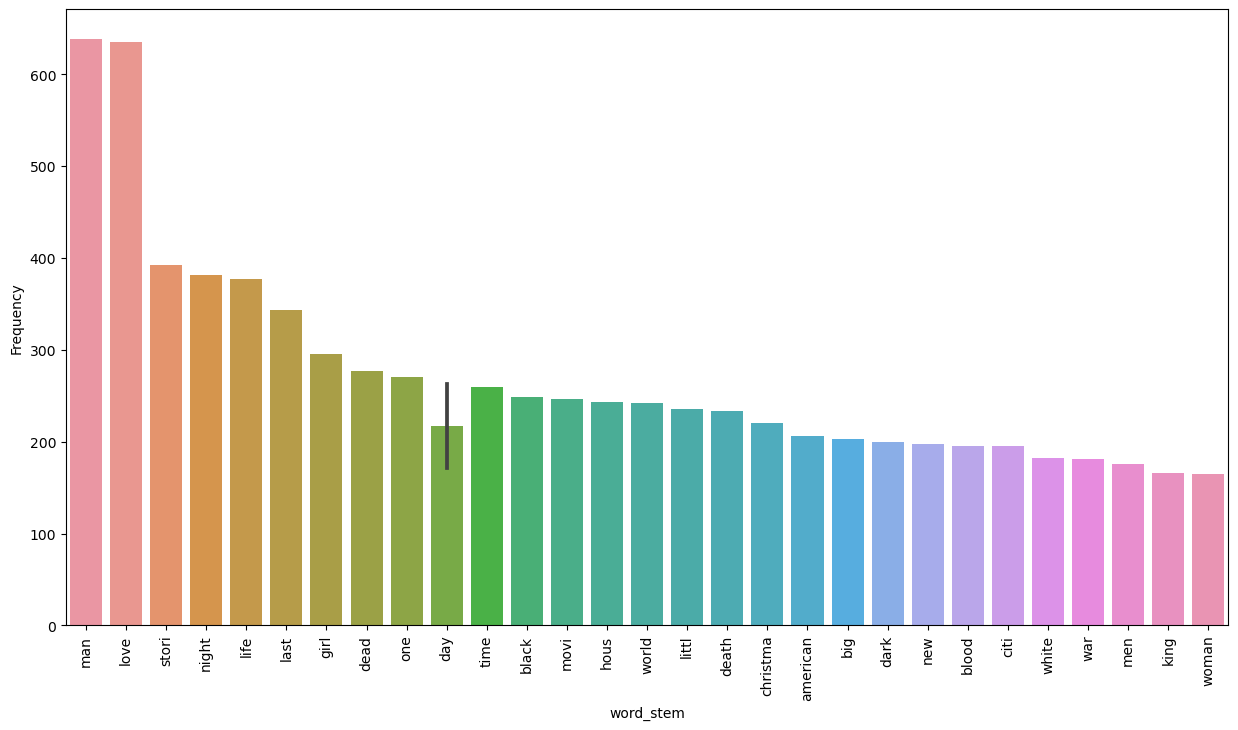

In [358]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Draw non-stemming title word

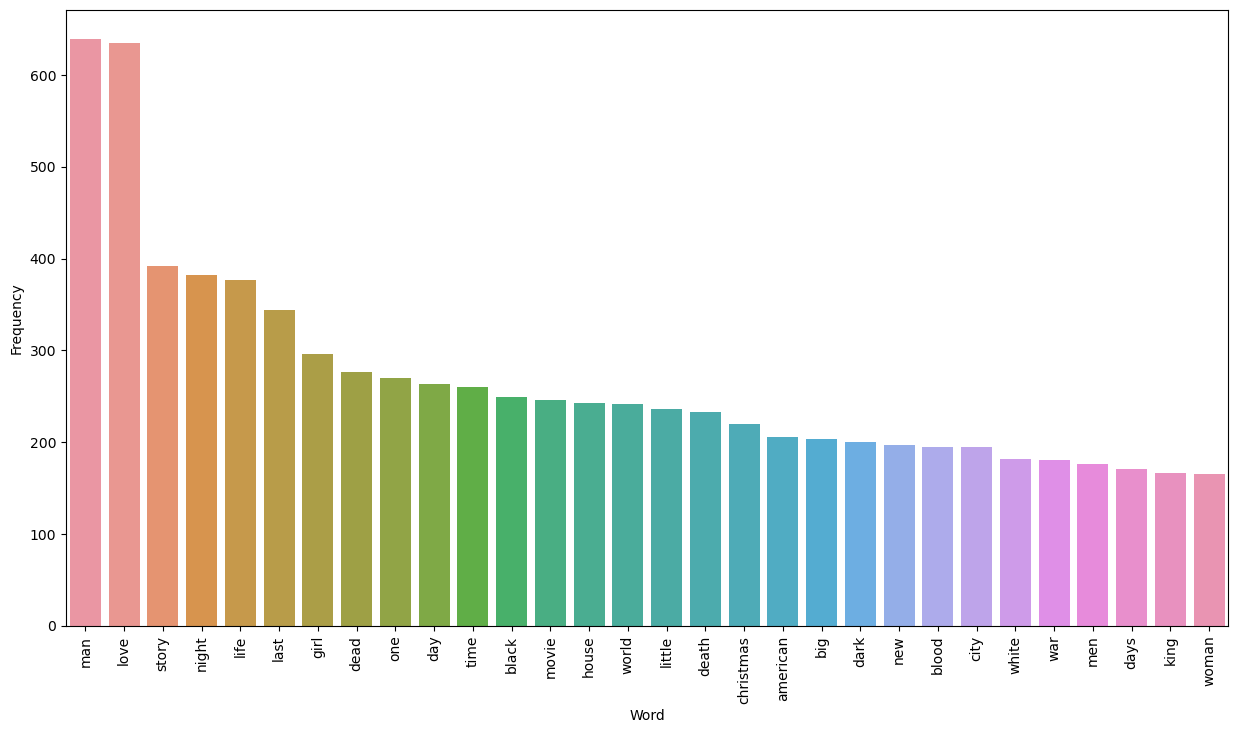

In [359]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].Word, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Load an image to draw the wordcloud

In [360]:
from PIL import Image
mask = np.array(Image.open(r'_src/assets/film.png'))

# Draw the wordcloud

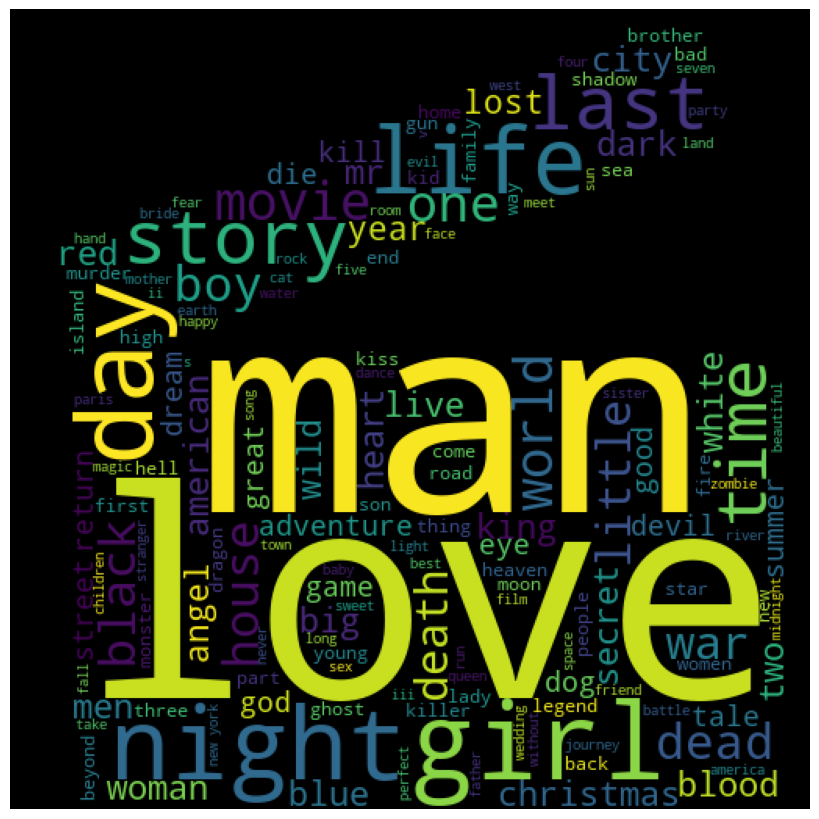

In [361]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(token1)

wordcloud = WordCloud(mask = mask, background_color="black", min_font_size=8, width = mask.shape[1],
               height = mask.shape[0]).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Create a word cloud with the movie overview

In [362]:
overview = df_title['overview'].to_list()

In [363]:
overview_word = [str(word).split(' ') for word in overview]

In [364]:
overview_word = [word for word_list in overview_word for word in word_list]

In [365]:
token0 = []
for word in overview_word:
  if len(word) >= 3:
    token0.append(word.lower())

In [366]:
token1 = [word for word in token0 if word not in stopwords_a]

In [367]:
fdist = nltk.FreqDist(token1)
fdist

FreqDist({'one': 6770, 'young': 6166, 'new': 5492, 'life': 5155, 'two': 5020, 'film': 4988, 'man': 4085, 'story': 4008, 'love': 3882, 'find': 3539, ...})

## Create a new dataframe to store the word and frequency

In [368]:
df_overview_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_overview_new.head()

,Word,Frequency
0,led,486
1,"woody,",5
2,andy's,16
3,toys,47
4,live,1281


In [369]:
df_overview_new.sort_values('Frequency',ascending=False, inplace = True)
df_overview_new.reset_index(drop = True, inplace=True)

In [370]:
overview_list=[]
for tit in df_overview_new['Word']:
   
    # Tokenizamos para separar las palabras del titular
    tit=nltk.word_tokenize(tit)
        
    # Aplicamos la funcion para buscar la raiz de las palabras
    tit=[stemmer.stem(word) for word in tit]
    # Por ultimo volvemos a unir el titular
    tit=" ".join(tit)
    
    # Vamos armando una lista con todos los titulares
    overview_list.append(tit)

In [371]:
df_overview_new['word_stem'] = overview_list

## Draw stemming overview word

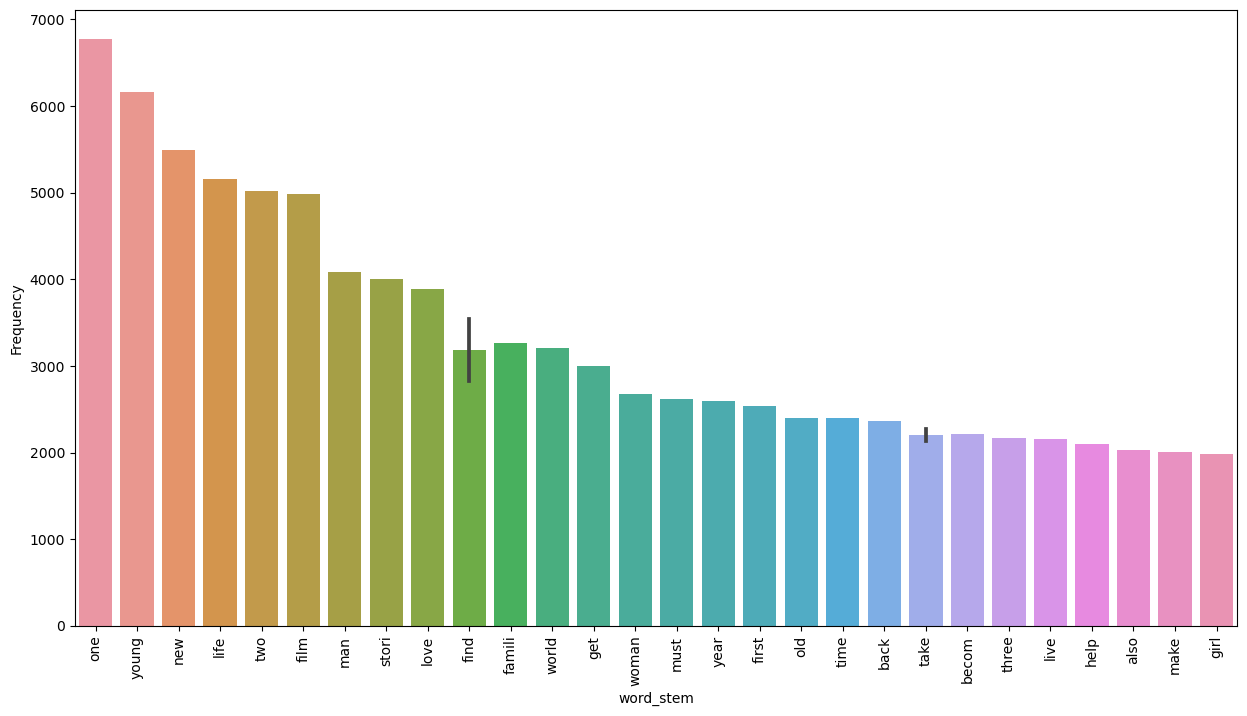

In [372]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_overview_new.iloc[:30].word_stem, y = df_overview_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Draw the wordcloud

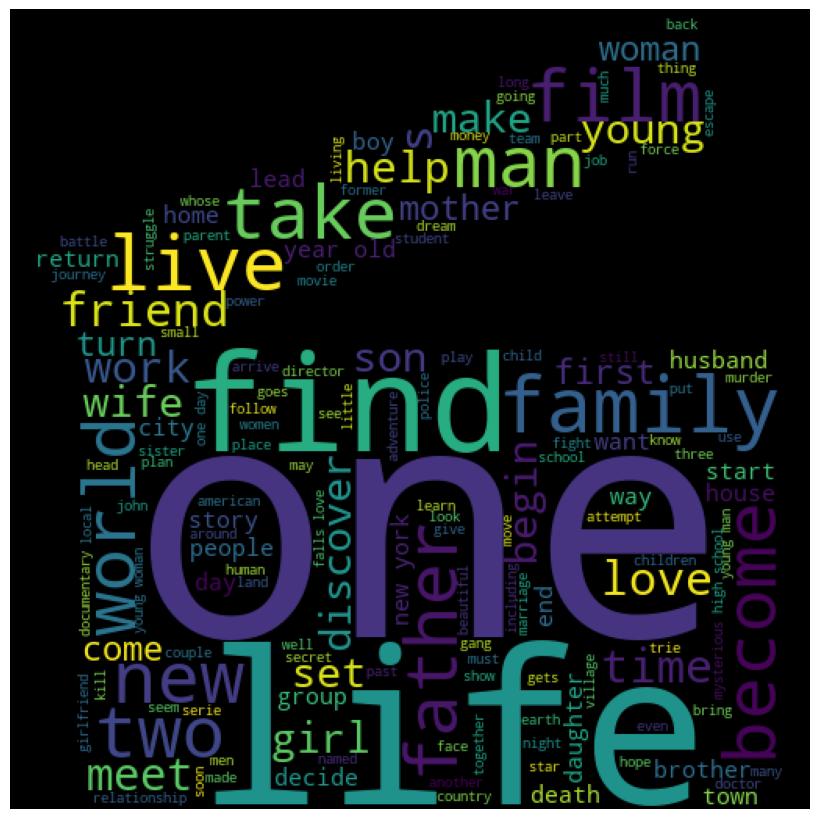

In [373]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(token1)

wordcloud = WordCloud(mask = mask, background_color="black", min_font_size=8, width = mask.shape[1],
               height = mask.shape[0]).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Heatmap

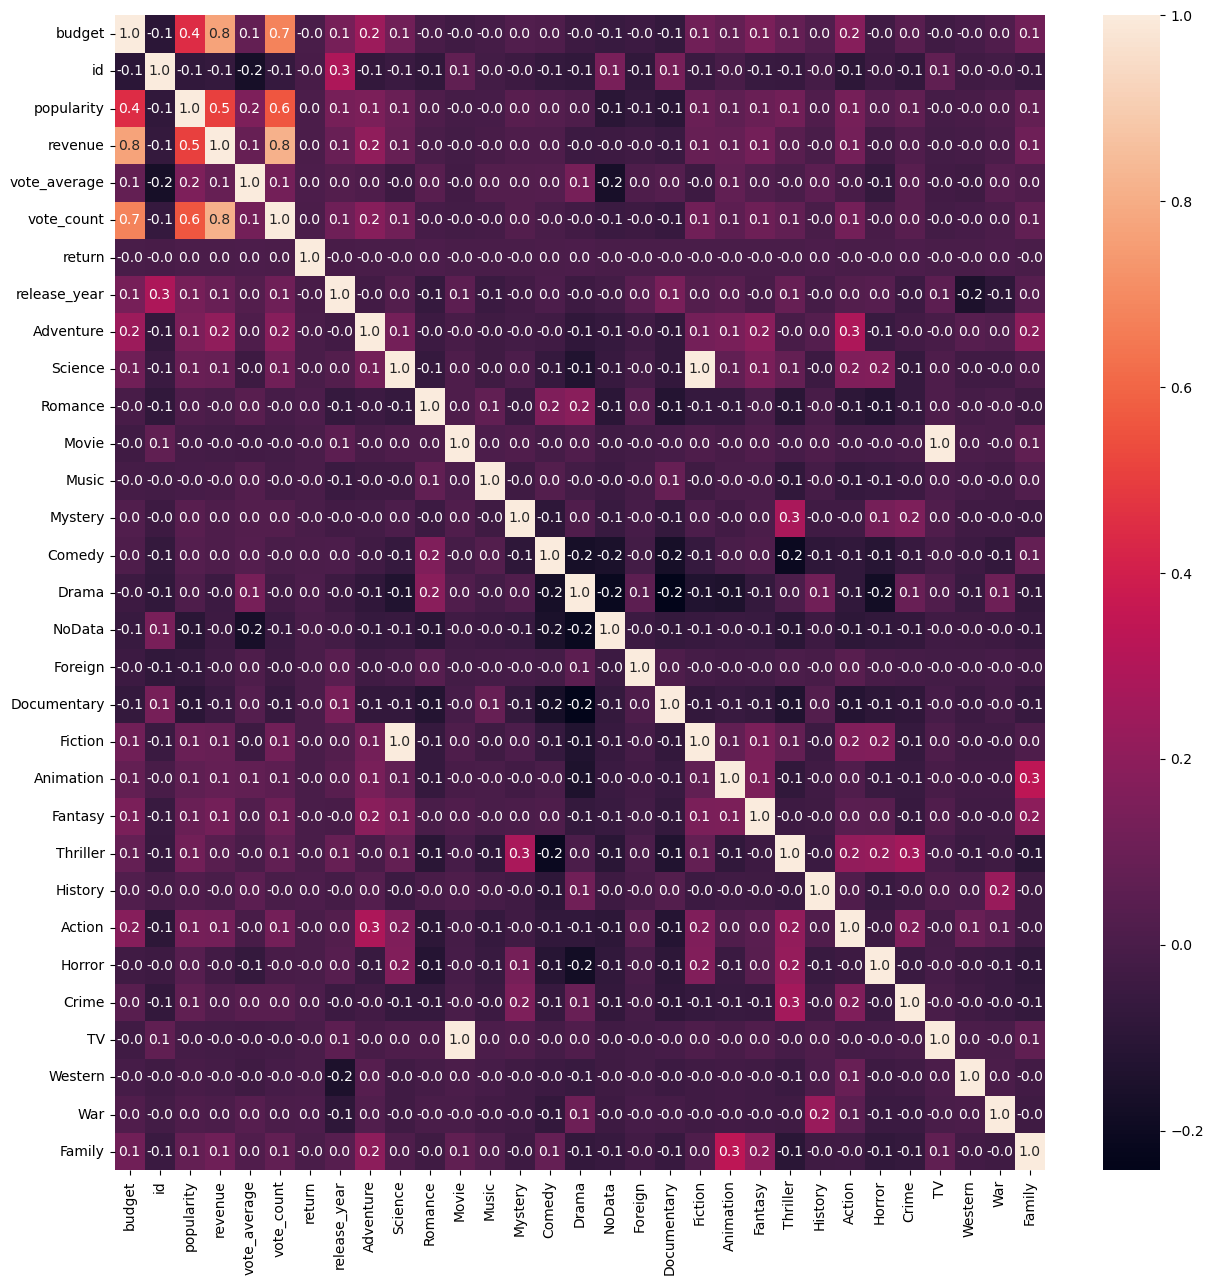

In [374]:
corr = df_title.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        fmt= '.1f',annot_kws={'size': 10},
        annot=True);

In [375]:
df = df_title.groupby(['release_year']).count()
df.head()

,budget,id,overview,popularity,revenue,title,vote_average,vote_count,return,cast,...,Fantasy,Thriller,History,Action,Horror,Crime,TV,Western,War,Family
release_year,,,,,,,,,,,,,,,,,,,,,
1874,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1878,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1883,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1887,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1888,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


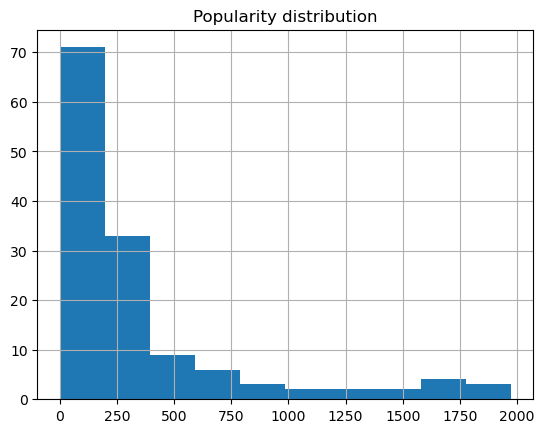

In [376]:
df['popularity'].hist()
plt.title('Popularity distribution')
plt.show()

In [377]:
df_title.sort_values(by='popularity', ascending=False).head(3)

,budget,id,overview,popularity,revenue,title,vote_average,vote_count,return,release_year,...,Fantasy,Thriller,History,Action,Horror,Crime,TV,Western,War,Family
30644,74000000.0,211672,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,1.156731e+09,Minions,6.4,4729.0,15.631499,2015,...,0,0,0,0,0,0,0,0,0,1
33295,149000000.0,297762,An Amazon princess comes to the world of Man t...,294.337037,8.205804e+08,Wonder Woman,7.2,5025.0,5.507251,2017,...,1,0,0,1,0,0,0,0,0,0
42124,160000000.0,321612,A live-action adaptation of Disney's version o...,287.253654,1.262886e+09,Beauty and the Beast,6.8,5530.0,7.893040,2017,...,1,0,0,0,0,0,0,0,0,1


In [378]:
df_title.sort_values(by=['vote_count', ], ascending=False).head(3)

,budget,id,overview,popularity,revenue,title,vote_average,vote_count,return,release_year,...,Fantasy,Thriller,History,Action,Horror,Crime,TV,Western,War,Family
15467,160000000.0,27205,"Cobb, a skilled thief who commits corporate es...",29.108149,8.255328e+08,Inception,8.1,14075.0,5.159580,2010,...,0,1,0,1,0,0,0,0,0,0
12472,185000000.0,155,Batman raises the stakes in his war on crime. ...,123.167259,1.004558e+09,The Dark Knight,8.3,12269.0,5.430046,2008,...,0,1,0,1,0,1,0,0,0,0
14540,237000000.0,19995,"In the 22nd century, a paraplegic Marine is di...",185.070892,2.787965e+09,Avatar,7.2,12114.0,11.763566,2009,...,1,0,0,1,0,0,0,0,0,0


## Create a new CSV file for the recomendation system

In [379]:
df_title.to_csv('ProcessedData/recommendation_system.csv', index=False)